# Effect of  individuals information on bike renting
## by ( Hany Osman)

## Investigation Overview

Join us in this investigation to explore  some insights in the Ford Go-Bike(a bike-sharing system) dataset in a number of slides for an easy understanding of the following relations:

>Distribution of bike trip duration (sec),
>
>Distribution of  age,
>
>Distribution of member gender and user type,
>
>The trrafic distribution per  hour of the day and per day ofthe weeks,
>
>Distribution of Bike Trip per  start_day of the week and start_hour of the day.
>
>Distribution of Bike Trip per start station name and end station name.
>
>Effect of bike trip duration(sec) by  age, start hour, days of the week ,member gender and user type,
>
>Distribution of bike share for all trip

## Dataset Overview

>Ford Go-Bike dataset created by a bike-sharing system covering the greater San Francisco Bay area for February of 2019, contains information about individual bike ridder like duration (sec) of trips, member information, station information.

>The raw dataset contains 183412 rows(trips or observations)  and  16 columns(features)
>
> As the data was not tidy and has a poor structure, most of the variables were cleaned, engineered, and converted several variables to a correct datatype.

>The final dataset after applying data Wrangling contains 174952 rows and 15 columns. Data type in columns included 2 are numerical, 2 are datetime,1 is boolean, 1 is category, and 9 are object type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
%matplotlib inline
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load the dataset csv file
df_bike=pd.read_csv('201902-fordgobike-tripdata.csv')
# get a copy for the dataframe to keep the original as it is.
df_ford= df_bike.copy()

In [3]:
# drop some columns which will not be used in this study
df_ford.drop(['start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)
# Drop these null values and inplace= True 
df_ford.dropna(inplace=True)

In [4]:
#https://www.geeksforgeeks.org/python-pandas-series-dt-strftime/
#convert data type of start_time to datetime. 
df_ford.start_time = pd.to_datetime(df_ford.start_time)
#convert data type end_time to datetime.
df_ford.end_time = pd.to_datetime(df_ford.end_time)

In [5]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.strftime.html
# we will extract month, day of week, hour from the start_time
df_ford['start_month']= df_ford.start_time.dt.strftime('%b')
df_ford['start_day_week']= df_ford.start_time.dt.strftime('%a')
df_ford['start_hour']= df_ford.start_time.dt.strftime('%H')


In [6]:
# change user_type from object to category
df_ford['user_type']= df_ford['user_type'].astype('category')
# change end_station_id to string
df_ford.end_station_id = df_ford.end_station_id.astype(str)
# change start_station_id to string
df_ford.start_station_id = df_ford.start_station_id.astype(str)

In [7]:
#Create a new column for age (age = today's date - member_birth_year)
# define the age column by using datetime.now library.
df_ford['age'] = datetime.now().year - df_ford.member_birth_year # today's date and time.
# create dataframe df-90
df_90 = df_ford[['duration_sec','member_birth_year', 'member_gender', 'age',  'user_type']]
#consider the age greater than 90 years is outliers
df_90 = df_90 [df_90["age"] > 90]

###  Distribution of Duration (sec) of Bike trips 
#### The distribution of Duration (sec) of Bike trips is right shewed, in  addition to the presence of oultiers  which are greater than whisker length as shown in the right box chart.
>#### So, I performed log transformation as shown in the left histogram chart.

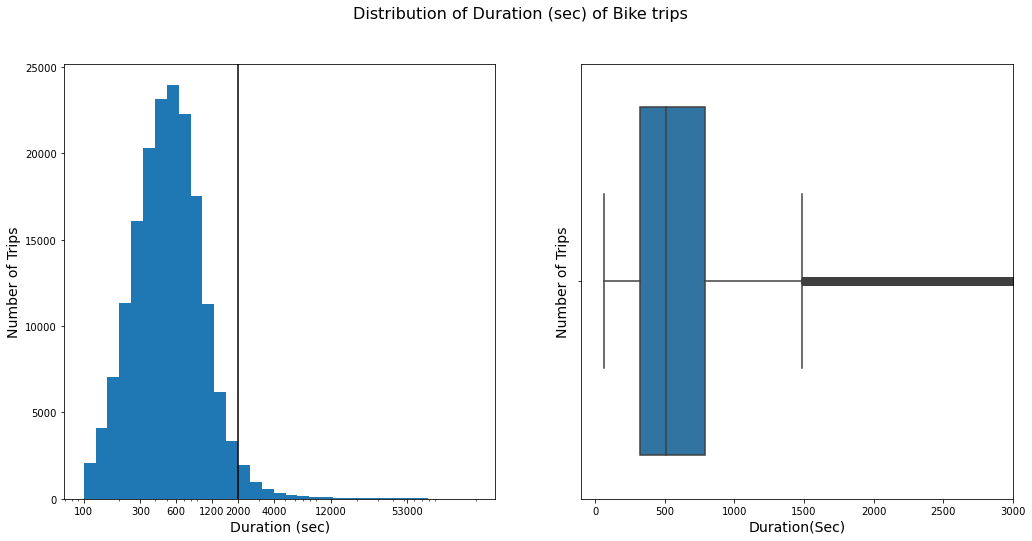

In [8]:
# plotting types of users.
plt.figure(figsize=[17,8])# define the figure size
plt.suptitle('Distribution of Duration (sec) of Bike trips ',fontsize=16)#set title for  both charts
# left side
plt.subplot(1,2,1)
# set bins for the histogram 
# format the bins
# describe log of bins to define their value 
bin_max=np.log10(df_ford.duration_sec.describe())
bins = 10 ** np.arange(2, bin_max.max() + 0.1, 0.1)
# plot histogram with defined ticks and labels.
plt.hist(data = df_ford, x = 'duration_sec', bins =bins)
ticks = [100, 300, 600 , 1200, 2000,4000, 12000,53000]#Ticks are markers denoting data points on x-axes.
labels = ['{}'.format(v) for v in ticks] #labels corresponding to tick marks
plt.xscale('log')# log -format of x axis. 
plt.xticks(ticks, labels)
plt.xlabel('Duration (sec)',fontsize=14)# x-axis label
plt.ylabel('Number of Trips', fontsize=14)# y-axis label
plt.axvline(x=2000, color = "black")
# Right side; box chart
# Outliers may be consider greater than 90 years and above.
plt.subplot(1,2,2)
# select color palette
base_color=sb.color_palette()[0]
#select box chart from seaborn to illustrate the outlier.
sb.boxplot(data=df_ford, x='duration_sec', color =base_color);
plt.xlim((-100,3000))
#label for x axis
plt.xlabel('Duration(Sec)',fontsize=14);
#label for y axis
plt.ylabel('Number of Trips', fontsize=14);

After log tranformation, the histogram of of Duration (sec) of Bike trips, shows that most of the values are less than 2000 sec(33 min) with peak around 600 sec(10 min).

## Distribution of User Age
The distribution of age was Skewed to the right and Log scale was needed as in the left histogram, in addition to outliers problems as in the right box chart. 

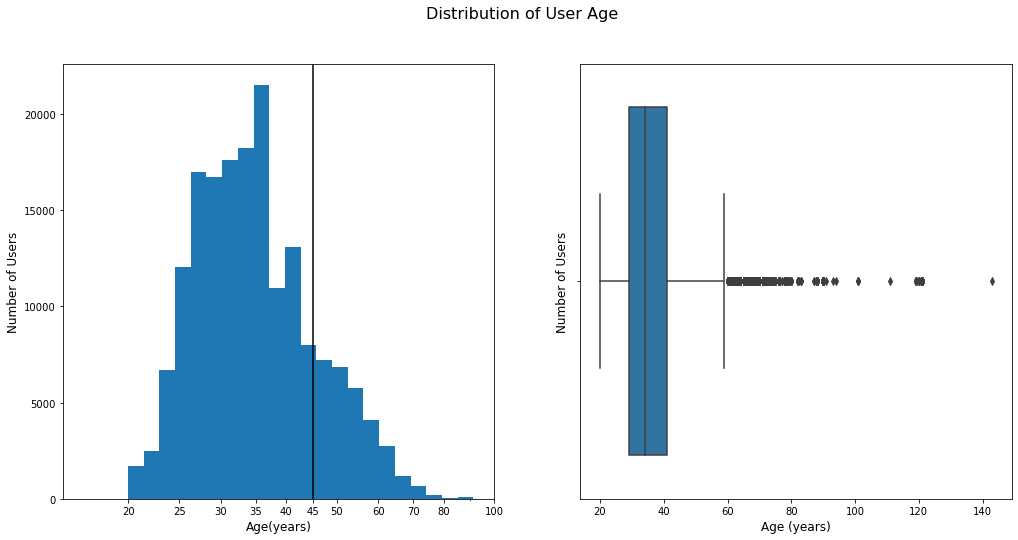

In [9]:
# plotting types of users by two different charts to search for any insights.
plt.figure(figsize=[17,8])
plt.suptitle('Distribution of User Age',fontsize=16)#set title for  both charts
# Left side
# the position of first chart
plt.subplot(1,2,1)#(subplot () function adds subplot subplot to a current figure at the specified grid position.)
bins = 10 ** np.arange(1, 2.5 + 0.03 ,0.03) 
plt.hist(data=df_ford, x='age', bins=bins)
ticks = [20,25, 30, 35 ,40, 45,50, 60, 70, 80, 100] #Ticks are markers denoting data points on x-axes.
labels = ['{}'.format(v) for v in ticks]#labels corresponding to tick marks
plt.xscale('log')
plt.xticks(ticks, labels)
plt.axvline(x=45, color = "black")
plt.xlabel('Age(years)',fontsize=12) # y axis label
plt.ylabel('Number of Users',fontsize=12)# x axis label
plt.xlim(15,100) # set the x limits of x-axis
# Right side box chart
# check for the Outliers.
# the position of second chart
plt.subplot(1,2,2)
# define the color palette for seaborn
base_color=sb.color_palette()[0]
sb.boxplot(data=df_ford, x='age', color =base_color);
plt.xlabel('Age (years)',fontsize=12); # X axis label
plt.ylabel('Number of Users', fontsize=12);# y axis label

As, It appears from the chart that the distribution is more concentrated between 20 and 45 years old with a mean of 34 years. There are some outliers as seen from the box chart which is above the higher whisker that is more than 1.5 times the IQR above the third quartile.

### Distribution of  Member gender & User_ Type 

The following Visualization consists of two graphs, the first pie diagram represents member gender with percentage of each gender. The second pie chart shows User Type with percentage of each type.

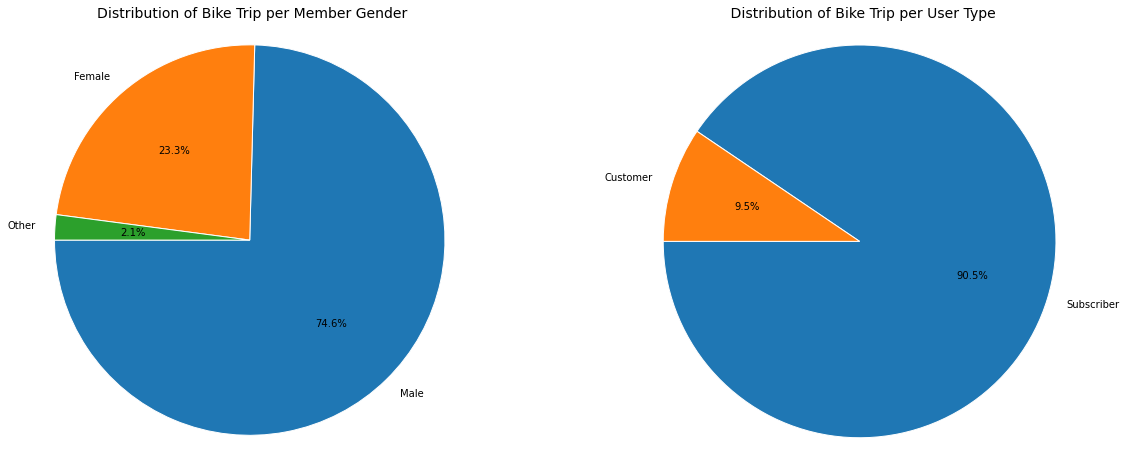

In [10]:
### Take a look at the distribution of Member Gender  User type
# plotting the Distribution of Bike Trip 
plt.figure(figsize=[20,8])
# left side
# plotting genders of user via pie chart
plt.subplot(1,2,1)
gender_sorted= df_ford['member_gender'].value_counts()
# Create a pieplot with specific wedgeprops option 
plt.pie(gender_sorted, labels = gender_sorted.index,autopct='%1.1f%%', startangle =180, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })# distribution via pie chart
plt.axis('square');
plt.title('Distribution of Bike Trip per Member Gender', fontsize=14);
# Right side
plt.subplot(1,2,2)
# distribution via bar chart per User Gender
type_counts= df_ford['user_type'].value_counts()
plt.pie(type_counts, labels = type_counts.index,autopct='%1.1f%%', startangle =180, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' })# distribution via pie chart
plt.axis('square'); #where the ranges for both axes occupy are equal to the length in plot.
plt.title(' Distribution of Bike Trip per User Type',fontsize=14);

It appears from the figures that:
> male gender is a higher precentage than females and others. 
>
>Subscriber users(90.5%) are heigher than Customer users(9.5%).

### Relation between User type and member gender.

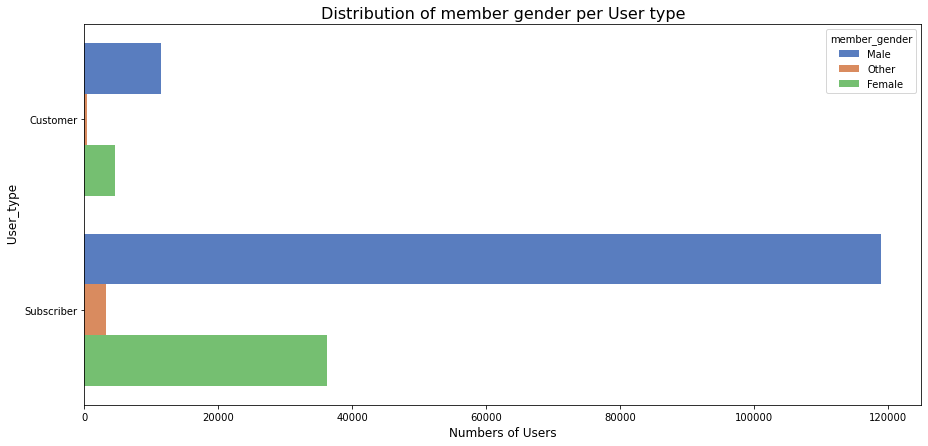

In [11]:
# determine member_gender for every user_type
ax = plt.subplots(figsize = (15,7))
#plot countplot chart from seaborn library with order regard to member_gender.  
ax=sb.countplot(data=df_ford, y='user_type', hue='member_gender', palette = 'muted'); 
ax.set_ylabel(' User_type', fontsize=12)#set y-axis label
ax.set_xlabel('Numbers of Users', fontsize=12)#set x-axis label
ax.set_title('Distribution of member gender per User type',fontsize=16);#set title for chart

 #### Subscriber users(male>female>other) are greater than customers(male>female>other) in number of trips. Male is greater than female  and other gender.

### Distribution of Bike Trip per  start_day of the week and start_hour of the day.

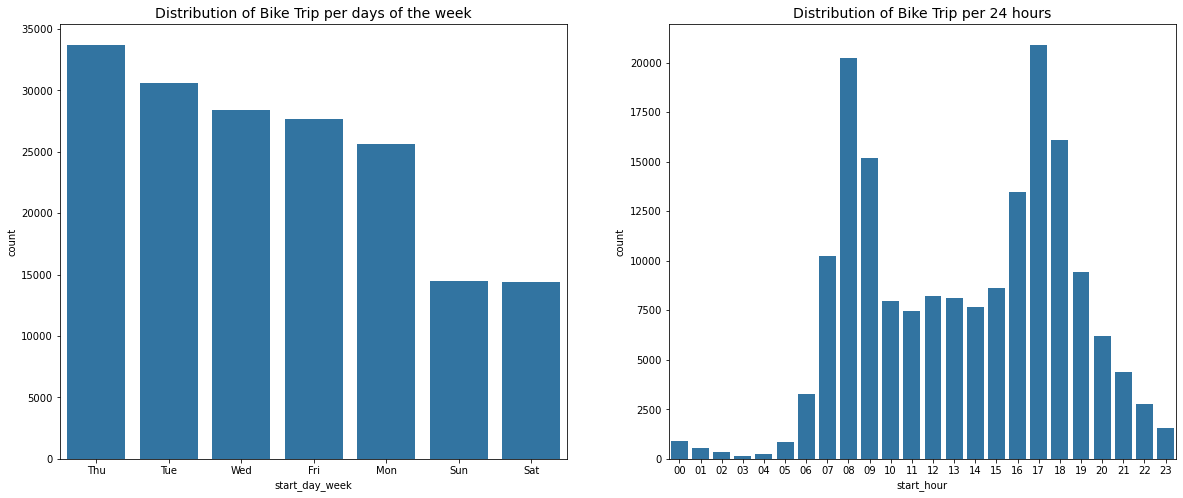

In [12]:
# set the sizefor the three figures.
plt.figure(figsize=[20,8])
base_color = sb.color_palette()[0] # set the base color palette for both charts
# Left side chart
#Distribution of Bike Trip per start_days of the week
plt.subplot(1,2,1)#define the number of rows and columns of the subplot grid for coutplot chart
#plot countplot chart from seaborn library with order regard to start_day_week. 
sb.countplot(data = df_ford, x = 'start_day_week', color = base_color, order=df_ford.start_day_week.value_counts().index)
plt.title('Distribution of Bike Trip per days of the week', fontsize=14);# set title for chart
# Right side chart
plt.subplot(1,2,2)#define the number of rows and columns of the subplot grid for bar chart.
#Distribution of Bike Trip per start_hour of the day.
hour_count=df_ford.groupby('start_hour').size()
hour_count = hour_count.reset_index(name = 'count')
sb.barplot(data = hour_count, x = 'start_hour',y='count', color = base_color);# Plot barplot chart from seaborn library.
plt.title('Distribution of Bike Trip per 24 hours', fontsize=14);# set title for chart

We can summerized charts above as follows:-
 >
 >1- Thursday, Wednesday and Tuesday  had a close distribution and have the most bike riders traffic,
 >
 >2- I can  see that number of bike trips during weekday is higher than weekend by about 40%.
 >
 >3- The bike riding have a peak at 7-9 am and from 16: 18 (4-6 pm).
 >
 >4-17 (5 PM) and 8 (8 AM) o'clock is the most hours have(traffic) bike riders.
 

### Distribution of Bike Trip per start station name and end station name.


In [13]:
#The high frequent  10 start station for bike rider
start_stat=df_ford['start_station_name'].value_counts(sort=True, ascending=False)[:10]

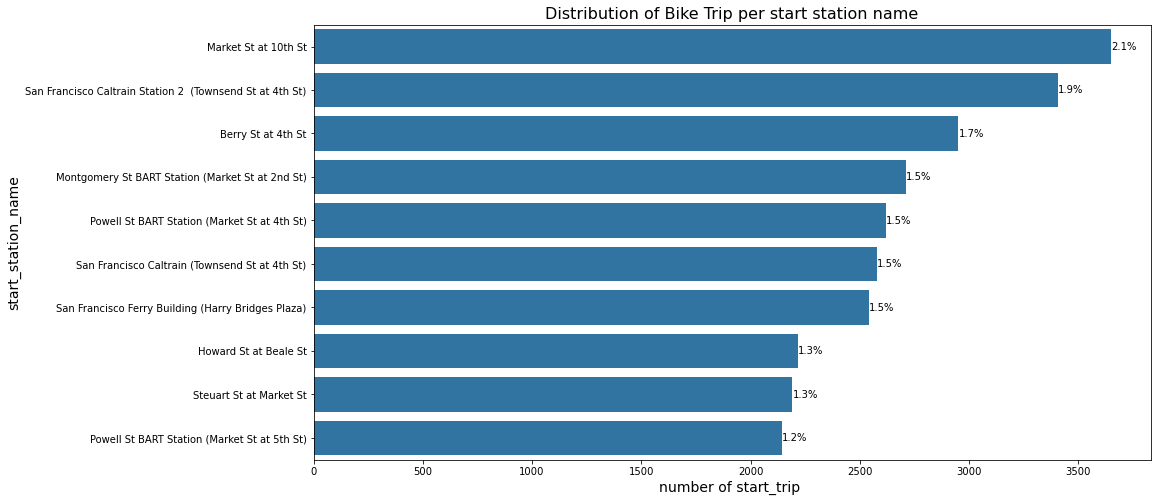

In [14]:
# plot  a bar chat for the distribution of Bike Trip per start station name
plt.figure(figsize=[15,8])
base_color = sb.color_palette()[0] #use seaborn color palette
#plot countplot chart from seaborn library with order regard to start station name.  
sb.countplot(data = df_ford, y = 'start_station_name', color = base_color, order=df_ford.start_station_name.value_counts().index[:10])
plt.title('Distribution of Bike Trip per start station name', fontsize=16);#set title for chart
plt.xlabel('number of start_trip ',fontsize=14);#set x-axis label
plt.ylabel('start_station_name',fontsize=14);#set y-axis label
# labelling percentage for every  start station 
start_label = df_ford.start_station_name.value_counts().head(10)
for v in range(start_label.shape[0]):
  label= start_label[v]
  pct_string = '{:0.1f}%'.format(100*label/df_ford.shape[0])# show count and  annotate for each bar.
  plt.text(label+1, v, pct_string, va = 'center');

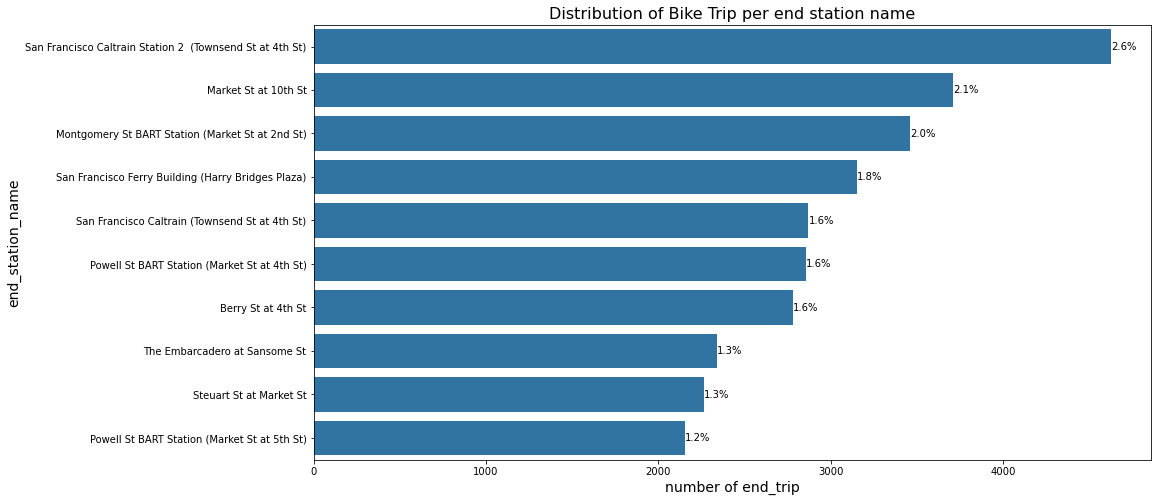

In [15]:
#The high frequent 10 end station for bike rider
end_stat=df_ford['end_station_name'].value_counts(sort=True, ascending=False)[:10]
plt.figure(figsize=[15,8])
#plot countplot chart from seaborn library with order regard to end station name.  
sb.countplot(data = df_ford, y = 'end_station_name', color = base_color, order=df_ford.end_station_name.value_counts().index[:10]);
plt.title('Distribution of Bike Trip per end station name', fontsize=16);#set title for chart
plt.xlabel('number of end_trip',fontsize=14);#set x-axis label
plt.ylabel('end_station_name',fontsize=14);#set y-axis label
# show percentage for every station 
end_label = df_ford.end_station_name.value_counts().head(10)
for v in range(end_label.shape[0]):
  label= end_label[v]
  pct_string = '{:0.1f}%'.format(100*label/df_ford.shape[0])# show annotate for each bar.
  plt.text(label+1, v, pct_string, va = 'center');

### As most of start station is the same as the end station, this confirms that most bike rider use bike to go to work or school mainly not in a picnic.

### Distribution of bike_share_for_all_trip
>From the next pie diagram, Most users (90.1%) didn't use the bike _share for all trips.

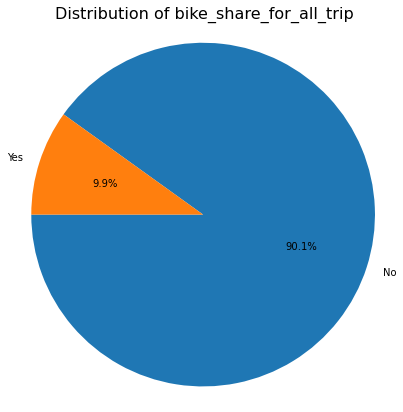

In [16]:
# distribution via pie chart per bike_share_for_all_trip
plt.figure(figsize=[16,7])
type_counts= df_ford['bike_share_for_all_trip'].value_counts()
plt.pie(type_counts, labels = type_counts.index,autopct='%1.1f%%', startangle =180)# distribution via pie chart
plt.axis('square'); #where the ranges for both axes occupy are equal to the length in plot.
plt.title('Distribution of bike_share_for_all_trip',fontsize=16);

### The relation between Duration of Bike Trips(sec) and Age
> scatter diagram  decleared that  the shorter the duration of the trip, the older the user.This means a  negative relationship between duration and age.

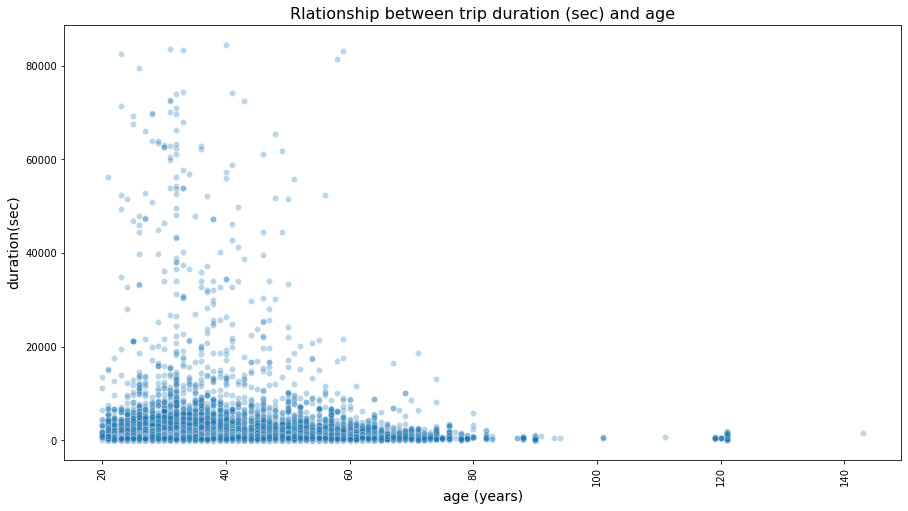

In [17]:
# distribution of Duration of Bike Trips(sec) and Age
plt.figure(figsize = (15,8))
sb.scatterplot(data = df_ford, x = "age", y = "duration_sec", alpha = 0.3)
plt.title("Rlationship between trip duration (sec) and age", fontsize=16)# set title for chart
plt.xlabel('age (years)', fontsize=14)#set x-axis label
plt.ylabel('duration(sec)', fontsize=14)#set y-axis label
plt.xticks(rotation = 90)#set x-axis ticks rotation
plt.show()

#### The most frequent bike riders have ages between 20 and 45( youth_members)
#### Youth_members (between 20 and 45) achieved higher trips duration.


### Relation between  Duration of Bike Trips (sec) and User type.
>The left diagram is a scatter plot shows the number of trips. 
>
>The right diagram is a box plot shows the median of trip duration for each type.

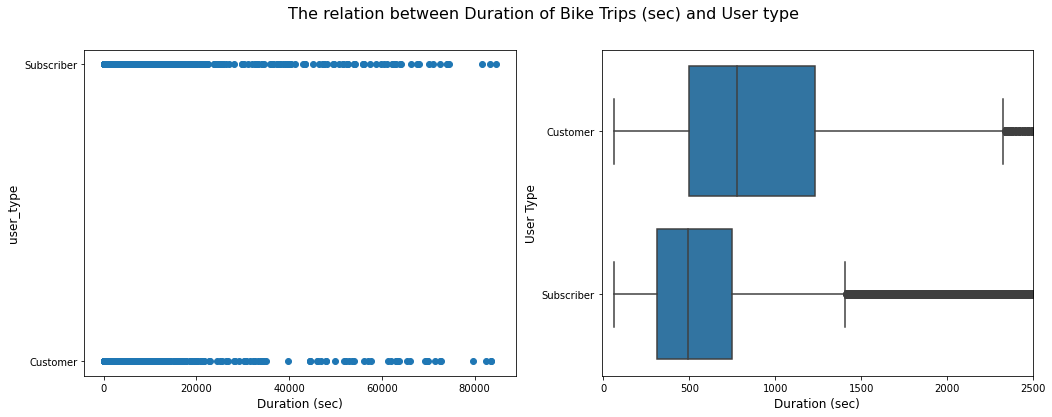

In [18]:
# plot the relation between duration of Bike Trips and User-type
plt.figure(figsize=[17,6])
plt.suptitle('The relation between Duration of Bike Trips (sec) and User type', fontsize=16)
base_color = sb.color_palette()[0]
# left side 
plt.subplot(1, 2, 1)
plt.scatter(data=df_ford,y="user_type", x="duration_sec")
plt.xlabel('Duration (sec)',fontsize=12)#set y-axis label
plt.ylabel('user_type',fontsize=12);#set x-axis label
# Right side
plt.subplot(1, 2, 2)
sb.boxplot(data = df_ford, y = 'user_type', x = 'duration_sec', color = base_color)
plt.xlim([-10, 2500]) # set limits for x_axis to 2500 to exclude outlier.
plt.ylabel('User Type',fontsize=12)#set y-axis label
plt.xlabel('Duration (sec)',fontsize=12)#set x-axis label
plt.show();

#### Subscriber users are greater than customers in number of trips but, customer users have a longer trip duration than Subscriber.

### Relation between Duration of Bike Trips (sec) and member gender.
>The left diagram is a scatter plot shows the number of trips.
>
>The right diagram is a box plot shows the median of trip duration for each gender

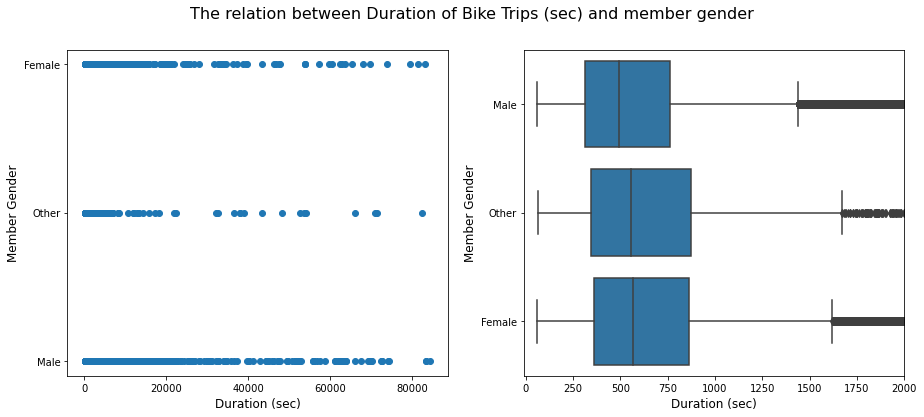

In [19]:
plt.figure(figsize=[15,6])
plt.suptitle('The relation between Duration of Bike Trips (sec) and member gender',fontsize=16)
# left side 
plt.subplot(1, 2, 1)
plt.scatter(data=df_ford,y="member_gender", x="duration_sec")
plt.xlabel('Duration (sec)',fontsize=12)#set x-axis label
plt.ylabel('Member Gender',fontsize=12);#set y-axis label
# Right side
plt.subplot(1, 2, 2)
sb.boxplot(data =df_ford, y = 'member_gender', x = 'duration_sec', color = base_color)
plt.xlim([-10, 2000])# limit the duration to 2000 sec to get a clear view.
plt.xlabel('Duration (sec)',fontsize=12)#set x-axis label
plt.ylabel('Member Gender',fontsize=12);#set y-axis label

#### Male bike riders are a higher number than other and female riders. On contract, Other and females ride bikes on longer trips than male riders.

### Duration of Trips (sec) per star day of the week.
>The left diagram is a barplot shows the duration (sec)for each day of the week.
>
>The right diagram is a box plot shows the median of trip duration for each day of the week.


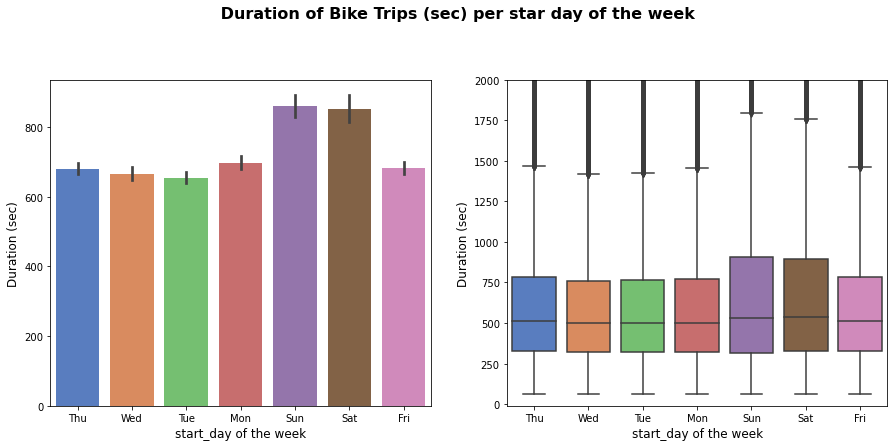

In [20]:
plt.figure(figsize=[15,6])
plt.suptitle(' Duration of Bike Trips (sec) per star day of the week', y=1.05, fontsize=16, fontweight='bold')
# left side 
plt.subplot(1, 2, 1)
sb.barplot(data=df_ford, x= 'start_day_week', y='duration_sec',palette = 'muted');
plt.ylabel('Duration (sec)',fontsize=12)#set y-axis label
plt.xlabel('start_day of the week',fontsize=12);#set x-axis label
# Rightside 
plt.subplot(1, 2, 2)
sb.boxplot(data = df_ford, x = "start_day_week",y='duration_sec',palette = 'muted')
plt.ylabel('Duration (sec)',fontsize=12)#set y-axis label
plt.xlabel('start_day of the week',fontsize=12);#set x-axis label
plt.ylim([-10, 2000]);# limit the duration to 2000 sec to get a clear view.

#### Weekends have the largest average of bike trip duration (sec) rather than weekdays.

### The relation between start day of the week and user type.
>The following diagram is a countplot chart shows the duration (sec)for each day of the week.



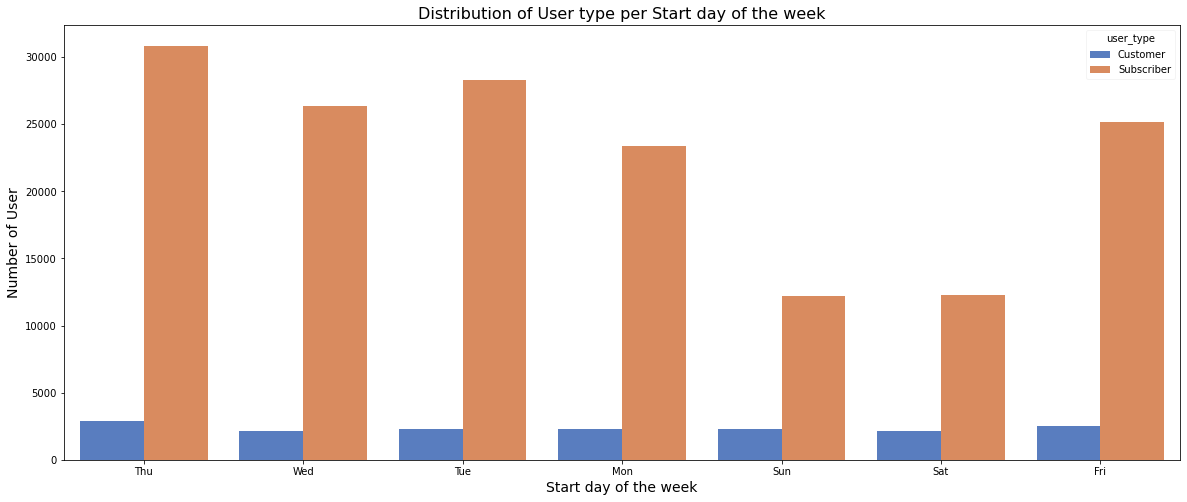

In [21]:
#Explore the relation between member_gender and Start day of the week.
plt.figure(figsize=[20,8])
#plot countplot chart from seaborn library with order regard to user_type.
# use color palette =Blues
day_user = sb.countplot(data = df_ford, x = 'start_day_week', hue = 'user_type',  palette = 'muted')
day_user.legend(loc = 1, framealpha = 0.2, title = 'user_type');# set and format legend for the chart.
day_user.set_xlabel('Start day of the week', fontsize=14)#set x-axis label
day_user.set_ylabel('Number of User', fontsize=14)#set y-axis label
day_user.set_title('Distribution of User type per Start day of the week', fontsize=16);# set title for chart.

#### The number of bike trips during weekday is higher than weekend by about 40-50 % for all gender.
#### Subscribers likely ride a bike during weekdays than weekends, and Customers are relatively constant a long the week.

### Distribution of Duration of Bike Trips (sec) for member gender in terms of Start day of the week 
>The following diagram is a box plot shows the median of trip duration for member gender in terms of Start day of the week.


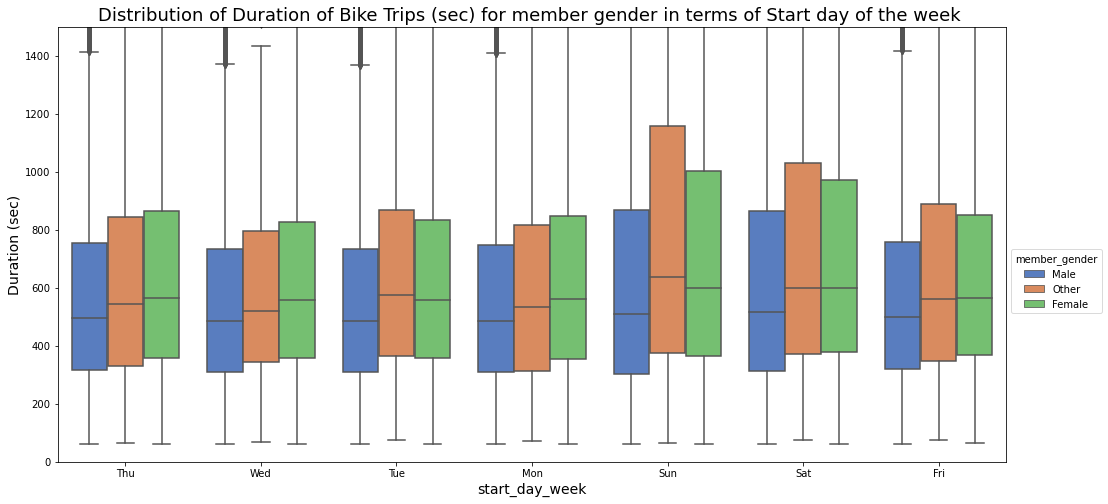

In [22]:
plt.figure(figsize=(17,8))# size of chart
sb.boxplot(x=df_ford.start_day_week, y= df_ford.duration_sec, hue=df_ford.member_gender,palette = 'muted');# select boxplot chart
plt.ylim([0, 1500]);#  limit the duration to 1500 sec(25 min) to get a clear view.
plt.legend(bbox_to_anchor=(1,0.5), framealpha = 0.7, title = 'member_gender');# set and format legend for the chart.
plt.xlabel('start_day_week', fontsize=14)# set label for x-axis
plt.ylabel('Duration (sec)', fontsize=14) # set label for y-axis
plt.title('Distribution of Duration of Bike Trips (sec) for member gender in terms of Start day of the week ', fontsize=18);# set title for chart

#### The median for  Female and other gender have a higher trip duration than  male alonge the week.
#### The median for  Female is higher than other along the week, except for Sunday and Tuesday other is heigher than female.

### Distribution of Duration of Bike Trips (sec) per Start hour of the day for User type
The following diagram is a barplot chart shows Distribution of Trip Duration(sec) for User type in terms of Start hour of the day

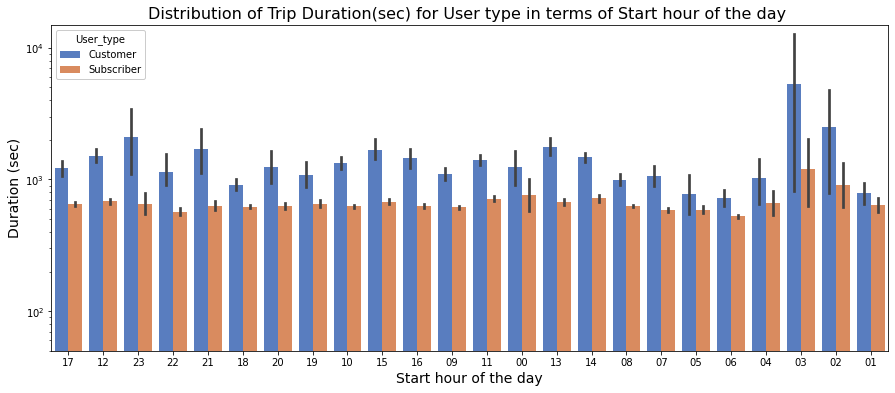

In [23]:
plt.figure(figsize=[15,6])
user_hour = sb.barplot(data =df_ford, x = 'start_hour', y = 'duration_sec', hue = 'user_type', palette = 'muted')
user_hour.legend(loc = 2, framealpha = 1, title = 'User_type')
plt.yscale('log')# log transformation to avoid the outlier.
plt.ylim([50, 15000]);# limit the duration to 15000 sec to get a clear view.
user_hour.set_xlabel('Start hour of the day', fontsize=14)
user_hour.set_ylabel('Duration (sec)', fontsize=14)
user_hour.set_title('Distribution of Trip Duration(sec) for User type in terms of Start hour of the day ', fontsize=16);

- for customer type 2 AM and  3 AM, the duration of biking is longer than any hour and than subscriber user.
- for subscriber user 2 AM, 3 AM the duration of biking is longer than any hour.

### Duartion(sec)of bike trip per member_gender in terms of start day of the week
>The next point diagram shows the relation of duartion(sec)of bike trip per member_gender in terms of start day of the week

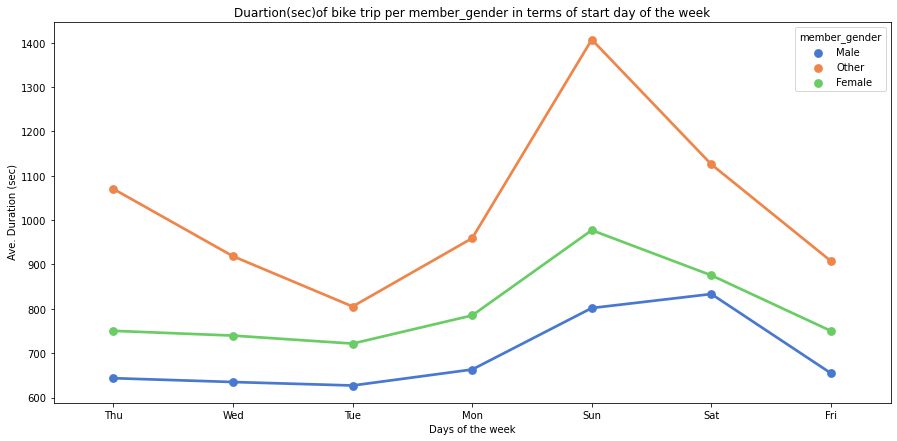

In [24]:
# Distribution of Duartion(sec) for bike trip per member_gender in terms of start day of the week
fig = plt.figure(figsize = [15,7])
sb.pointplot(data = df_ford, x = 'start_day_week', y = 'duration_sec', hue = 'member_gender', ci=None, palette = 'muted')
plt.title('Duartion(sec)of bike trip per member_gender in terms of start day of the week')
plt.ylabel(' Ave. Duration (sec)')
plt.xlabel('Days of the week');

##### other  gender >female >male in Ave. Duration (sec) in weekends rather than weekdays.

### Duration of Bike Trip (sec) per star day of the week in terms of bike_share_for_all_trip and in terms of bike_share_for_all_trip
>The left point diagram shows the relation of duration of Bike Trip (sec) per star day of the week in terms of user _type.
>
>The right countplot diagram shows the relation of duration of Bike Trip (sec) per star day of the week in terms of bike_share_for_all_trip.

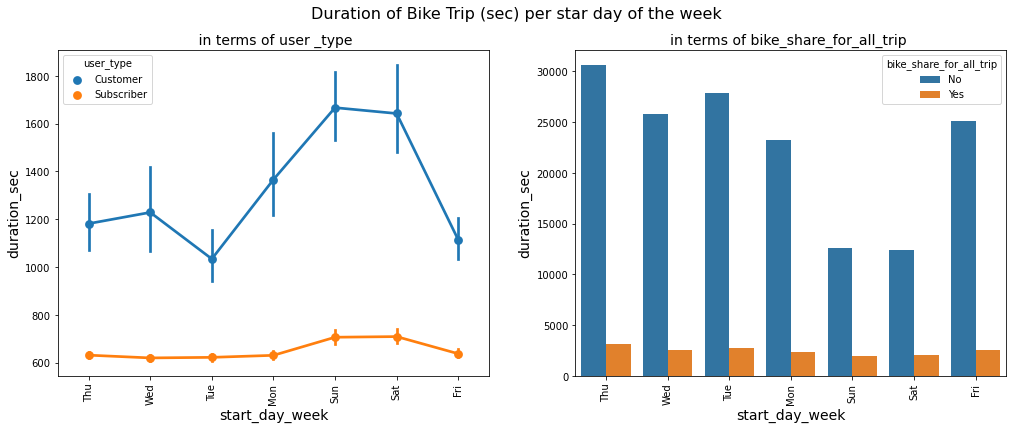

In [25]:
# Distribution of Duration of Bike Trip (sec) per star day of the week in terms of user _type
plt.figure(figsize=(17,6))
plt.suptitle('Duration of Bike Trip (sec) per star day of the week', fontsize=16)
plt.subplot(1,2,1)
sb.pointplot(data=df_ford, x='start_day_week', y='duration_sec', hue='user_type')
plt.title(" in terms of user _type", fontsize=14);
plt.xlabel('start_day_week', fontsize=14);#set x-axis label
plt.ylabel('duration_sec', fontsize=14),#set y-axis label
plt.xticks(rotation=90);
plt.subplot(1,2,2)## Distribution of Duration of Bike Trip (sec) per star day of the week in terms of bike_share_for_all_trip 
sb.countplot(data=df_ford,x='start_day_week',hue='bike_share_for_all_trip')
plt.title("in terms of bike_share_for_all_trip ", fontsize=14);
plt.xlabel('start_day_week', fontsize=14);#set x-axis label
plt.ylabel('duration_sec', fontsize=14),#set y-axis label
plt.xticks(rotation=90);

### It is appeared that
 > Customers have heigher trip duration (sec) in weekends rather than subscriber.
 

### Distribution of Bike Sharing per User type
>this diagram check if subscribers are the only user type that uses a Bike sharing system or not
>
>Subscriber use bike share system for all trip are about 9.9% from total bike rider in the following 

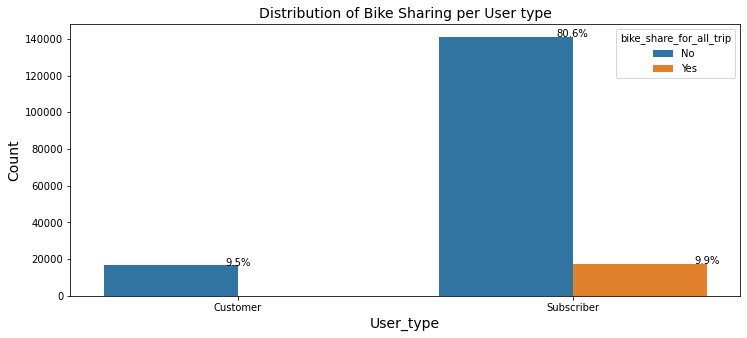

In [26]:
#check if subscribers are the only user type that uses a Bike sharing system or not?
ax = plt.subplots(figsize = (12,5))
ax=sb.countplot(data=df_ford,x='user_type',hue='bike_share_for_all_trip')
ax.set_xlabel('User_type',fontsize=14)#set x-axis label
ax.set_ylabel('Count',fontsize=14)#set y-axis label
ax.set_title('Distribution of Bike Sharing per User type',fontsize=14);
#add percentages on top of bars in seaborn
total = float(len(df_ford))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

### Thanks for your Time